# Defining the problem statements 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot to be included in the notebook
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [2]:
df= pd.read_csv(r"C:/Users/SHREYA/Desktop/ML/miniprojects/Heart_disease/6.1 heart-disease.csv.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The above data has no null values and hence ready for use

In [6]:
df.shape

(303, 14)

In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

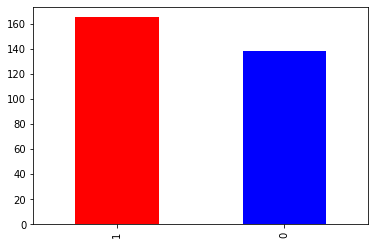

In [9]:
df.target.value_counts().plot(kind= "bar", color=["Red","Blue"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



# Heart disease freq wrt Sex

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
# Compare target cols with sex

In [15]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [16]:
 # sex---> 1-Male 0-Female
 # target---> 1-yes 0-no

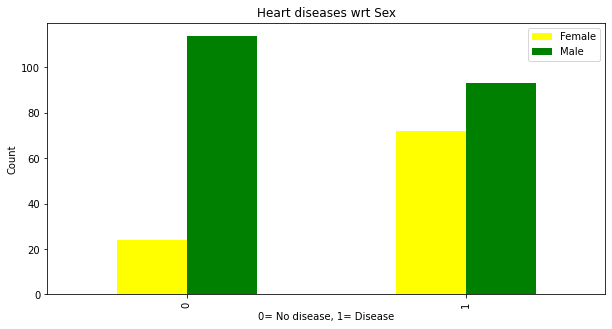

In [17]:
pd.crosstab(df.target, df.sex).plot(kind= "bar",
                                    color=["yellow", "green"],
                                    figsize=(10,5))
plt.title("Heart diseases wrt Sex")
plt.xlabel("0= No disease, 1= Disease")
plt.ylabel("Count")
plt.legend(["Female","Male"])



In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [20]:
# Age vs target

Text(0, 0.5, 'Heart Rate')

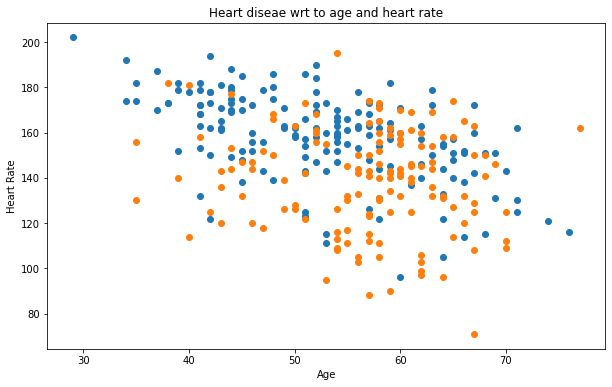

In [21]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1])

plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0])


plt.title("Heart diseae wrt to age and heart rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")


In [22]:
df.age.min()

29

<AxesSubplot:ylabel='Frequency'>

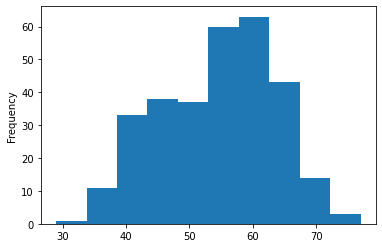

In [23]:
df.age.plot.hist()

In [24]:
# THE ABVE GRAPH IS TO CHECK THE NORMAL DISTRIBUTION WHICH NORMALLY HAS TO BE A BELL SHAPED CURVE BUT WE SEE THAT THE PLOT IN HERE HAS A SKEWNESS TOWARDS THE SIDE WHERE THE AGE IS ON THE OLDER SIDE

In [25]:
# Heart dsease /chest pain

In [26]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


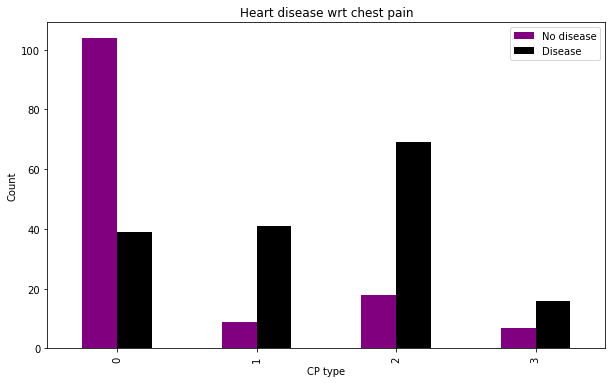

In [27]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize= (10,6),
                                 color=["purple", "black"])
plt.title("Heart disease wrt chest pain")
plt.xlabel("CP type")
plt.ylabel("Count")
plt.legend(["No disease", "Disease"])

In [28]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


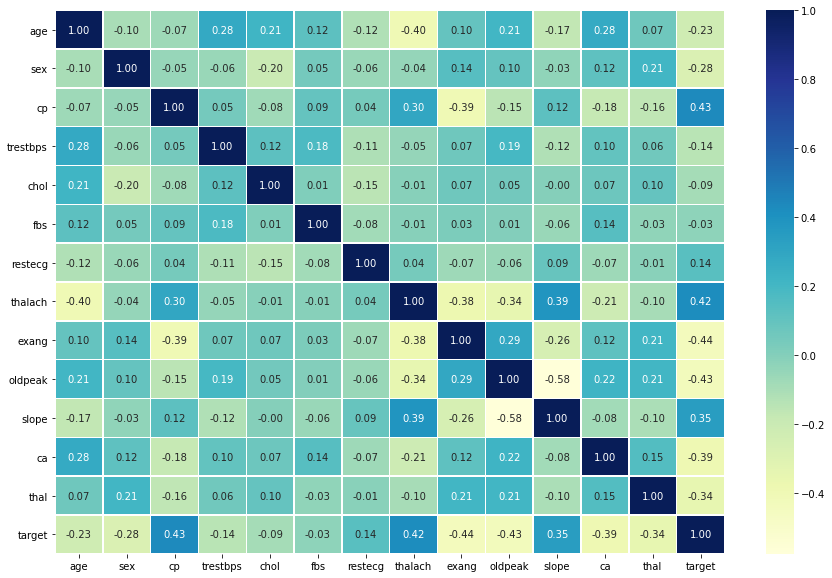

In [29]:
corr_matrix= df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot= True,
               linewidth=0.5,
               fmt="0.2f",
               cmap="YlGnBu")

# Modelling

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
# split the data into x and y

In [32]:
x= df.drop("target", axis=1)
y=df.target

In [33]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [35]:
np.random.seed(12)

In [36]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2)

In [37]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2


In [38]:
y_train

238    0
224    0
31     1
139    1
47     1
      ..
259    0
130    1
241    0
253    0
155    1
Name: target, Length: 242, dtype: int64

In [39]:
len(x_train)

242

## The algorithms that will be used 
1. Logistic Regression
2. KNN
3. RFC

In [40]:
models={"LR": LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "RF": RandomForestClassifier()}
# Function to fit the models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [41]:
 model_scores= fit_and_score(models=models, x_train= x_train,
                            x_test= x_test,y_train= y_train,y_test= y_test)
model_scores


C:\Users\SHREYA\anaconda3\envs\CDAC\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.7868852459016393, 'KNN': 0.6557377049180327, 'RF': 0.8360655737704918}

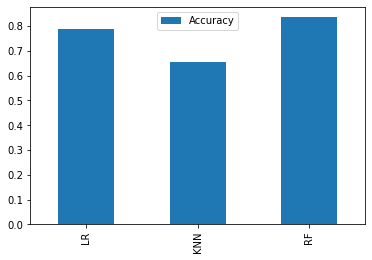

In [42]:
model_compare=pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

In [43]:
#Tuning KNN as it has the lowest accuracy

In [81]:
# Hyperparameter tuning by hand
train_scores=[]
test_scores=[]


# list of different values for n neighbours

neighbors= range(1,20)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit the model
    knn.fit(x_train, y_train)
    #Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    #Update the testscore list
    test_scores.append(knn.score(x_test,y_test))
    


In [82]:
train_scores

[1.0,
 0.8016528925619835,
 0.7727272727272727,
 0.7644628099173554,
 0.78099173553719,
 0.7727272727272727,
 0.7396694214876033,
 0.7396694214876033,
 0.7272727272727273,
 0.7272727272727273,
 0.7066115702479339,
 0.7148760330578512,
 0.7024793388429752,
 0.7148760330578512,
 0.71900826446281,
 0.6900826446280992,
 0.6942148760330579,
 0.6983471074380165,
 0.6942148760330579]

In [83]:
test_scores

[0.4918032786885246,
 0.5245901639344263,
 0.5409836065573771,
 0.6065573770491803,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.639344262295082]

0.6885245901639344


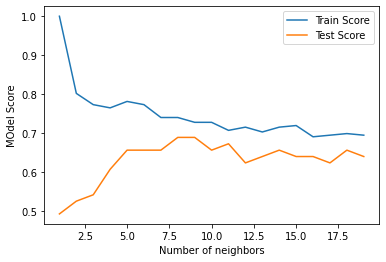

In [84]:
plt.plot(neighbors,train_scores, label="Train Score")
plt.plot(neighbors,test_scores, label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("MOdel Score")
plt.legend()
plt.xticks
print(max(test_scores))
